## MINIST数据集得多模型验证试验

### 导入必要的数据集并进行预处理

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

# 加载MNIST数据集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 数据归一化处理
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# one-hot编码标签
Y_train = to_categorical(Y_train, 10)  # 修改此处
Y_test = to_categorical(Y_test, 10)    # 修改此处

# 打印数据形状确认
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
Y_train shape: (60000, 10)
Y_test shape: (10000, 10)


### 定义并训练分类模型

#### LeNet

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 创建LeNet模型
def create_lenet():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (5, 5), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation='tanh'))
    model.add(Dense(84, activation='tanh'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 创建并训练模型
lenet_model = create_lenet()
lenet_history = lenet_model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test))

# 返回历史记录对象
lenet_history


d:\Anaconda3\envs\tensorflow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4686 - loss: 1.7967 - val_accuracy: 0.8687 - val_loss: 0.5499
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8783 - loss: 0.4915 - val_accuracy: 0.9095 - val_loss: 0.3406
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9126 - loss: 0.3311 - val_accuracy: 0.9266 - val_loss: 0.2629
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9280 - loss: 0.2622 - val_accuracy: 0.9376 - val_loss: 0.2181
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9386 - loss: 0.2237 - val_accuracy: 0.9454 - val_loss: 0.1884
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9470 - loss: 0.1950 - val_accuracy: 0.9519 - val_loss: 0.1650
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9538 - loss: 0.1708 - val_accuracy: 0.9564 - val_loss: 0.1488
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9574 - loss: 0.1531 - val_accuracy:

#### AlexNet

In [5]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping

# 1. 定义AlexNet模型
def create_alexnet(input_shape=(28, 28, 1)):
    model = Sequential()
    # 第一层卷积层，调整卷积核和步幅，使用padding='same'
    model.add(Conv2D(96, (11, 11), strides=(1, 1), activation='relu', input_shape=input_shape, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))  # 池化层
    # 第二层卷积层
    model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))  # 池化层

    # 第三层卷积层
    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

    # 第四层卷积层
    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

    # 第五层卷积层
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))  # 池化层

    # 展平层，准备输入到全连接层
    model.add(Flatten())

    # 全连接层1
    model.add(Dense(4096, activation='relu'))

    # 全连接层2
    model.add(Dense(4096, activation='relu'))

    # 输出层
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

alexnet_model = create_alexnet(input_shape=(28, 28, 1))

# 训练过程中添加EarlyStopping回调，避免过拟合
earlystop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 训练模型
alexnet_history = alexnet_model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test), callbacks=[earlystop])

alexnet_history

d:\Anaconda3\envs\tensorflow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 276s 584ms/step - accuracy: 0.6539 - loss: 0.9434 - val_accuracy: 0.9831 - val_loss: 0.0569
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 206s 439ms/step - accuracy: 0.9817 - loss: 0.0607 - val_accuracy: 0.9851 - val_loss: 0.0519
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 186s 396ms/step - accuracy: 0.9877 - loss: 0.0394 - val_accuracy: 0.9900 - val_loss: 0.0321
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 210s 449ms/step - accuracy: 0.9898 - loss: 0.0354 - val_accuracy: 0.9894 - val_loss: 0.0349
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 197s 420ms/step - accuracy: 0.9923 - loss: 0.0260 - val_accuracy: 0.9862 - val_loss: 0.0466
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 184s 393ms/step - accuracy: 0.9917 - loss: 0.0289 - val_accuracy: 0.9900 - val_loss: 0.0422


#### GoogleNet

In [3]:
# GoogleNet模型定义与训练 (Cell 4)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

# 创建GoogleNet模型
def create_googlenet():
    model = Sequential()
    model.add(Conv2D(64, (7, 7), strides=(2, 2), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Conv2D(192, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# 创建并训练模型
googlenet_model = create_googlenet()
googlenet_history = googlenet_model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test))

# 返回历史记录对象
googlenet_history


d:\Anaconda3\envs\tensorflow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7730 - loss: 0.6859 - val_accuracy: 0.9812 - val_loss: 0.0590
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9761 - loss: 0.0751 - val_accuracy: 0.9869 - val_loss: 0.0429
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9849 - loss: 0.0487 - val_accuracy: 0.9820 - val_loss: 0.0520
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9875 - loss: 0.0395 - val_accuracy: 0.9897 - val_loss: 0.0350
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9912 - loss: 0.0271 - val_accuracy: 0.9890 - val_loss: 0.0342
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9915 - loss: 0.0254 - val_accuracy: 0.9890 - val_loss: 0.0330
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9939 - loss: 0.0197 - val_accuracy: 0.9849 - val_loss: 0.0488
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9942 - loss: 0.0184 - val_accu

#### VGG16

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# 创建VGG16模型（修改输入形状为28x28x1）
def create_vgg16(input_shape=(28, 28, 1)):
    model = Sequential()

    # 第一个卷积块：两个3x3卷积层 + 最大池化
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 第二个卷积块：两个3x3卷积层 + 最大池化
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 第三个卷积块：三个3x3卷积层 + 最大池化
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten层
    model.add(Flatten())
    
    # 全连接层
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))  # 防止过拟合
    model.add(Dense(10, activation='softmax'))  # 输出层

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 创建并训练VGG16模型
vgg16_model = create_vgg16(input_shape=(28, 28, 1))
vgg16_history = vgg16_model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test))

# 返回历史记录对象
vgg16_history


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 105s 221ms/step - accuracy: 0.8107 - loss: 0.5412 - val_accuracy: 0.9869 - val_loss: 0.0422
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 104s 221ms/step - accuracy: 0.9851 - loss: 0.0494 - val_accuracy: 0.9912 - val_loss: 0.0287
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 104s 222ms/step - accuracy: 0.9909 - loss: 0.0328 - val_accuracy: 0.9926 - val_loss: 0.0203
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 127s 272ms/step - accuracy: 0.9924 - loss: 0.0248 - val_accuracy: 0.9930 - val_loss: 0.0276
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 294ms/step - accuracy: 0.9929 - loss: 0.0228 - val_accuracy: 0.9922 - val_loss: 0.0237
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 105s 223ms/step - accuracy: 0.9944 - loss: 0.0189 - val_accuracy: 0.9924 - val_loss: 0.0255
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 126s 270ms/step - accuracy: 0.9945 - loss: 0.0177 - val_accuracy: 0.9934 - val_loss: 0.0256
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 112s 239ms/step - accuracy: 0.9953 -

#### 绘制四种模型的准确率与损失变化图

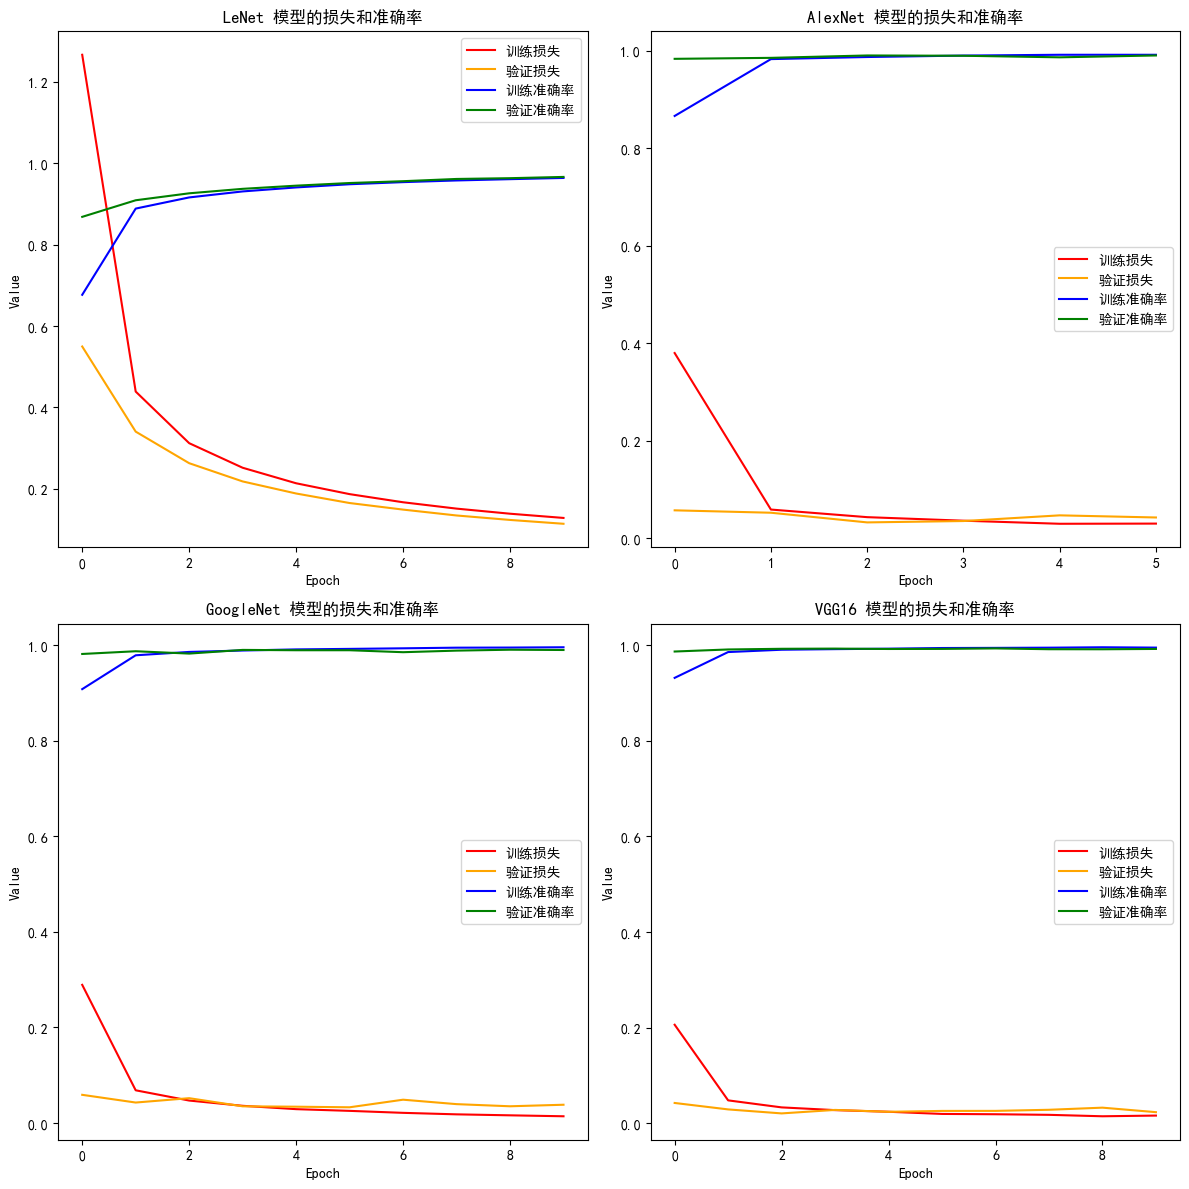

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置全局字体为 SimHei（SimHei 是中文字体）
rcParams["font.family"] = "simHei"

# 绘制四个模型的损失和准确率图
def plot_training_history(histories, titles):
    plt.figure(figsize=(12, 12))

    for i, history in enumerate(histories):
        plt.subplot(2, 2, i+1)  # 创建 2x2 网格的子图，并选择第 i+1 个子图位置

        # 绘制损失曲线（训练损失和验证损失）
        plt.plot(history.history['loss'], label='训练损失', color='red')
        plt.plot(history.history['val_loss'], label='验证损失', color='orange')

        # 绘制准确率曲线（训练准确率和验证准确率）
        plt.plot(history.history['accuracy'], label='训练准确率', color='blue')
        plt.plot(history.history['val_accuracy'], label='验证准确率', color='green')

        # 设置标题、标签、图例等
        plt.title(f'{titles[i]} 模型的损失和准确率')
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.legend()

    plt.tight_layout()  # 自动调整子图之间的间距
    plt.show()

histories = [lenet_history, alexnet_history, googlenet_history, vgg16_history]
titles = ['LeNet', 'AlexNet', 'GoogleNet', 'VGG16']

# 绘制图像
plot_training_history(histories, titles)


## 使用自定义数据集进行分类模型训练

### 图像数据集文件操作部分

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# 获取目录中最大的编号，作为新数据集的起始编号
def getMaxImageIndex(directory, label=None):
    if not os.path.exists(directory):
        return 1  # 从1开始编号
    files = os.listdir(directory)
    max_index = 0
    for file in files:
        if file.endswith('.png'):
            # 获取文件的数字编号
            base_name = file.split('.')[0]
            try:
                file_label, index = map(int, base_name.split('_'))  # 获取文件名中的标签和组编号
            except ValueError:
                continue  # 跳过不符合命名规则的文件
            if label is None or file_label == label:  # 如果指定了标签，过滤相应标签的文件
                max_index = max(max_index, index)
    return max_index + 1  # 返回下一个编号

# 定义获取并保存320*320的手写数字的函数，保存时将图像压缩为32*32，并按顺序命名为{数字标签}_{第几组数字}.png
def getNSaveHandwrittenDigit(num=20, is_validation=False):
    # 根据当前目录最大编号生成新的编号
    folder = './data/validation' if is_validation else './data/images'
    start_idx = getMaxImageIndex(folder)
    
    img = np.zeros((320, 320), np.uint8)  # 初始化320x320的黑色画布
    counter = 0
    brush_size = 5  # 设置画笔大小为5

    # 创建保存图像的文件夹（如果不存在）
    if not os.path.exists(folder):
        os.makedirs(folder)

    # 鼠标回调函数
    def mouse_callback(event, x, y, flags, param):
        nonlocal img
        if event == cv2.EVENT_LBUTTONDOWN:  # 鼠标左键按下
            cv2.circle(img, (x, y), brush_size, (255, 255, 255), -1)  # 用白色绘制圆形，模拟画笔
        elif event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON:  # 按住左键移动
            cv2.circle(img, (x, y), brush_size, (255, 255, 255), -1)  # 用白色绘制圆形

    while counter < num:
        # 显示窗口，标题根据当前数据类型和数字显示
        label = counter % 10
        data_type = "train" if not is_validation else "Valid"
        window_name = f"Write {data_type} {label}"
        cv2.namedWindow(window_name)
        cv2.setMouseCallback(window_name, mouse_callback)
        
        cv2.imshow(window_name, img)
        key = cv2.waitKey(1)  # 等待按键事件

        if key == ord('q'):  # 按'q'键保存并退出
            # 将320x320图像压缩为32x32，并保存
            resized_img = cv2.resize(img, (32, 32))
            group_number = getMaxImageIndex(folder, label)  # 获取当前标签的最大组编号
            cv2.imwrite(f'{folder}/{label}_{group_number}.png', resized_img)
            img = np.zeros((320, 320), np.uint8)  # 清空图像以便继续画下一个
            cv2.destroyWindow(window_name)  # 销毁当前窗口
            counter += 1
        
        if key == ord('r'):  # 按'r'键重置图像
            img = np.zeros((320, 320), np.uint8)  # 重置画布

    cv2.destroyAllWindows()

# 该为True时，生成验证集数据，否则扩展训练集数据
valid_mode = True
data_type_to_generate = 'validation' if valid_mode else 'train'

if data_type_to_generate == 'train':
    print("Generating training data...")
    getNSaveHandwrittenDigit(20, is_validation=False)  # 生成训练集数据
elif data_type_to_generate == 'validation':
    # 检查验证集是否已经存在
    validation_exists = len([f for f in os.listdir('./data/validation') if f.endswith('.png')]) == 20
    if not validation_exists:
        print("Generating validation data...")
        getNSaveHandwrittenDigit(20, is_validation=True)  # 生成验证集数据
    else:
        print("Validation data already exists. Skipping generation.")
else:
    print("Invalid data type specified. Choose 'train' or 'validation'.")


Generating validation data...


### 数据集的增强模块

In [11]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2


def getMaxImageIndex(directory, label=None):
    if not os.path.exists(directory):
        return 1  # 从1开始编号
    files = os.listdir(directory)
    max_index = 0
    for file in files:
        if file.endswith('.png'):
            # 获取文件的数字编号
            base_name = file.split('.')[0]
            try:
                file_label, index = map(int, base_name.split('_'))  # 获取文件名中的标签和组编号
            except ValueError:
                continue  # 跳过不符合命名规则的文件
            if label is None or file_label == label:  # 如果指定了标签，过滤相应标签的文件
                max_index = max(max_index, index)
    return max_index + 1  # 返回下一个编号

def loadingNLoadingImages(data_path):
    images = []
    labels = []
    
    # 检查数据目录是否存在
    if not os.path.exists(data_path):
        raise FileNotFoundError(f"图像文件夹 '{data_path}' 不存在，确保文件已保存")
    
    for label in range(10):  # 处理每个标签0~9
        max_group = getMaxImageIndex(data_path, label)
        for group in range(1, max_group):
            img_path = f'{data_path}/{label}_{group}.png'
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # 检查图像是否加载成功
            if img is None:
                print(f"Error loading image {img_path}")
                continue
            
            img = cv2.resize(img, (32, 32))  # 确保图像大小为32x32
            img = img / 255.0  # 归一化到0-1之间
            images.append(img)
            labels.append(label)
    
    images = np.array(images).reshape(-1, 32, 32, 1)  # 转换为适合TensorFlow训练的格式
    labels = np.array(labels)
    
    return images, labels

def dataAugmentationModule(images, labels, num_augmented=1000, batch_size=32, seed=42):
    """
    对训练集数据进行增强，并将增强后的数据与原始数据合并。
    
    参数:
    images (numpy.ndarray): 原始图像数据，形状为 (num_samples, height, width, channels)。
    labels (numpy.ndarray): 原始标签数据，形状为 (num_samples,)。
    num_augmented (int): 需要增强的数据量，即增强后的数据总量。
    batch_size (int): 每次生成的批次大小。
    seed (int): 随机种子。
    
    返回:
    numpy.ndarray: 扩展后的图像数据。
    numpy.ndarray: 扩展后的标签数据。
    """
    
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False
    )
    
    np.random.seed(seed)
    tf.random.set_seed(seed)
    datagen.fit(images)
    
    augmented_images = []
    augmented_labels = []
    
    # 使用datagen生成增强的数据
    flow = datagen.flow(images, labels, batch_size=batch_size, shuffle=True, seed=seed)
    
    while len(augmented_images) < num_augmented:
        batch_images, batch_labels = next(flow)
        augmented_images.extend(batch_images)
        augmented_labels.extend(batch_labels)
        
    # 限制增强数据量
    augmented_images = np.array(augmented_images[:num_augmented])
    augmented_labels = np.array(augmented_labels[:num_augmented])
    
    # 合并原始数据和增强数据
    expanded_images = np.concatenate((images, augmented_images), axis=0)
    expanded_labels = np.concatenate((labels, augmented_labels), axis=0)
    
    return expanded_images, expanded_labels


# 设置是否进行数据增强
use_augmentation = True  # 设置为 False 以跳过数据增强

# 加载训练数据
try:
    train_images, train_labels = loadingNLoadingImages('./data/images')
    print(f"Original training data shape: {train_images.shape}, {train_labels.shape}")
except FileNotFoundError as e:
    print(str(e))
    # 根据需要，您可以选择停止执行或继续

if use_augmentation:
    train_images_aug, train_labels_aug = dataAugmentationModule(train_images, train_labels, num_augmented=1000, seed=42)
    print(f"Augmented training data shape: {train_images_aug.shape}, {train_labels_aug.shape}")
    
    # 显示数据增强前后的形状
    print(f"Before augmentation: {train_images.shape}, {train_labels.shape}")
    print(f"After augmentation: {train_images_aug.shape}, {train_labels_aug.shape}")
    
    # 覆盖原有训练数据
    train_images = train_images_aug
    train_labels = train_labels_aug
else:
    print("Data augmentation skipped. Using original training data.")


Original training data shape: (140, 32, 32, 1), (140,)
Augmented training data shape: (1140, 32, 32, 1), (1140,)
Before augmentation: (140, 32, 32, 1), (140,)
After augmentation: (1140, 32, 32, 1), (1140,)


### 训练和评估模型

Validation data shape: (20, 32, 32, 1), (20,)


d:\Anaconda3\envs\tensorflow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 665,738 (2.54 MB)

 Trainable params: 665,738 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1492 - loss: 2.2489 - val_accuracy: 0.1754 - val_loss: 2.1095
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4099 - loss: 1.7195 - val_accuracy: 0.4035 - val_loss: 1.6640
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6616 - loss: 1.0726 - val_accuracy: 0.5526 - val_loss: 1.2343
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8264 - loss: 0.6193 - val_accuracy: 0.6491 - val_loss: 1.1623
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9071 - loss: 0.3537 - val_accuracy: 0.6316 - val_loss: 1.3065
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9292 - loss: 0.2383 - val_accuracy: 0.6579 - val_loss: 1.4758
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9509 - loss: 0.1745 - val_accuracy: 0.6579 - val_loss: 1.2544
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9743 - loss: 0.0997 - val_accuracy: 0.7018 - v

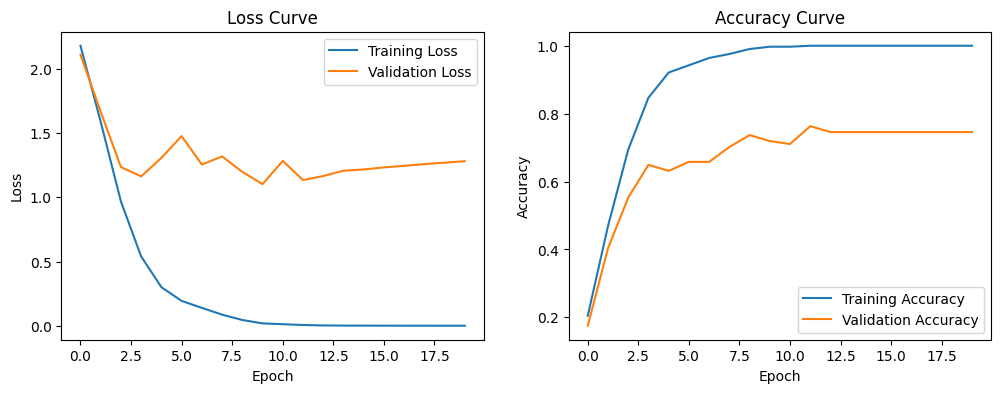

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


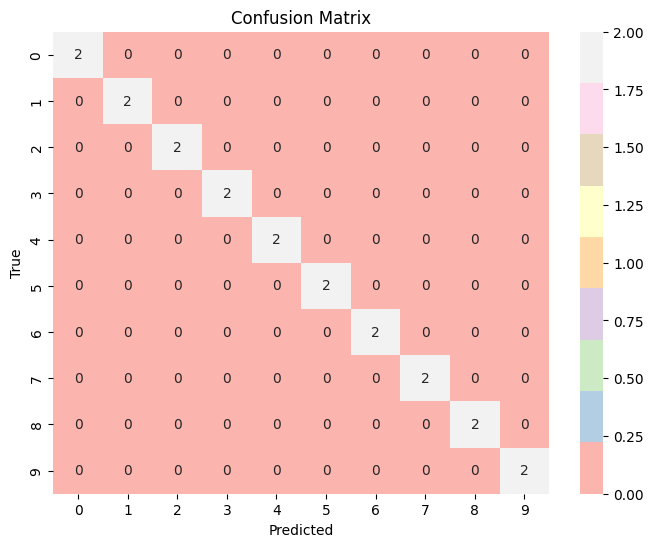

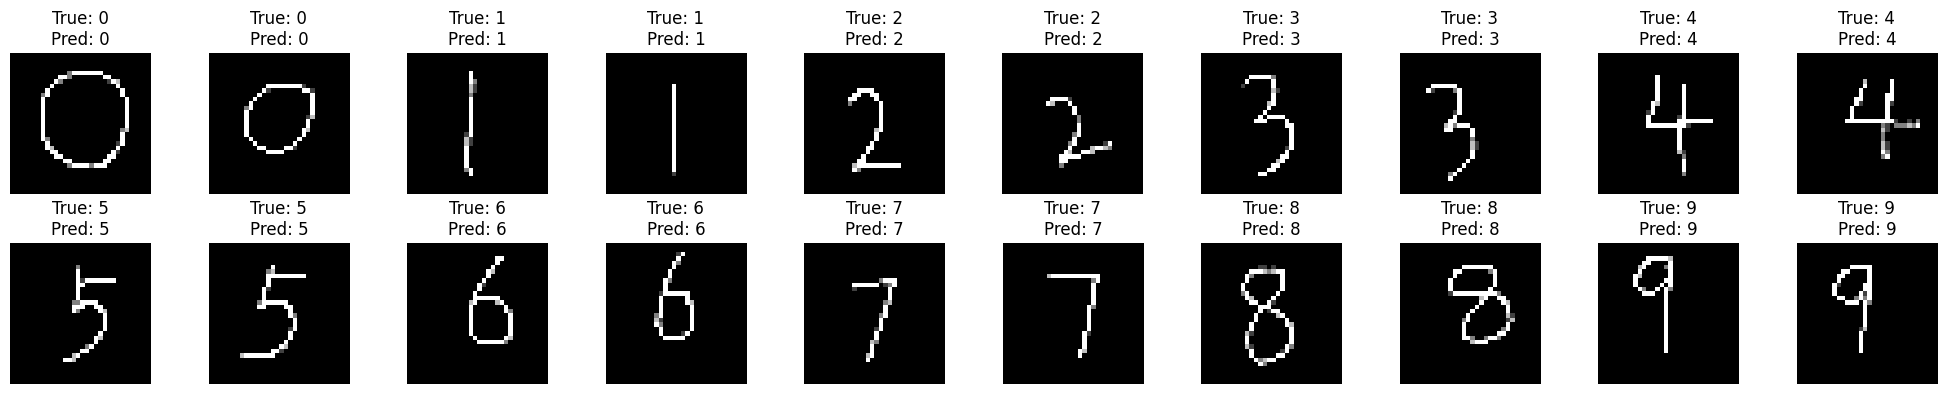

In [12]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def buildGoogLeNetModel():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 1)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')  # 10个类别
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def trainModel(model, train_images, train_labels, epochs=20, batch_size=32):
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.1)
    return history

def evaluateModel(model, valid_images, valid_labels):
    predictions = np.argmax(model.predict(valid_images), axis=1)
    cm = confusion_matrix(valid_labels, predictions)
    
    # 绘制混淆矩阵
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Pastel1", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
    
    # 绘制验证集图片及其标签和预测值（2行10列，共20张）
    plt.figure(figsize=(20, 4))
    for i in range(len(valid_images)):
        if i >= 20:
            break
        plt.subplot(2, 10, i+1)
        plt.imshow(valid_images[i].reshape(32, 32), cmap='gray')
        plt.title(f"True: {valid_labels[i]}\nPred: {predictions[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


try:
    train_images
    train_labels
except NameError:
    print("请先运行数据增强模块（Cell 2）以定义 train_images 和 train_labels。")
    # 根据需要，可以选择停止执行
    import sys
    sys.exit()

# 加载验证数据
try:
    valid_images, valid_labels = loadingNLoadingImages('./data/validation')
    valid_images = valid_images.reshape(-1, 32, 32, 1)
    print(f"Validation data shape: {valid_images.shape}, {valid_labels.shape}")
except FileNotFoundError as e:
    print(str(e))
    # 根据需要，可以选择停止执行
    import sys
    sys.exit()

# 构建GoogleNet模型
model = buildGoogLeNetModel()
model.summary()

# 训练模型
history = trainModel(model, train_images, train_labels, epochs=20, batch_size=32)

# 绘制训练过程中的损失和准确率
plt.figure(figsize=(12, 4))

# 绘制损失曲线
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# 绘制准确率曲线
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

# 评估模型
evaluateModel(model, valid_images, valid_labels)


#### 迁移数据集

In [ ]:
import os
import shutil

def moveValidationToTraining():
    validation_folder = './data/validation'
    training_folder = './data/images'
    
    # 创建训练集文件夹（如果不存在）
    if not os.path.exists(training_folder):
        os.makedirs(training_folder)
    
    # 获取所有验证集图片
    validation_images = [f for f in os.listdir(validation_folder) if f.endswith('.png')]
    
    for img in validation_images:
        try:
            img_label, group = map(int, img.split('.')[0].split('_'))  # 获取标签和组编号
        except ValueError:
            print(f"Skipping file with invalid name format: {img}")
            continue
        
        # 获取训练集中当前标签的最大组编号
        start_group = getMaxImageIndex(training_folder, img_label)
        
        # 重命名组编号
        new_group = start_group
        dest_path = f'{training_folder}/{img_label}_{new_group}.png'
        src_path = os.path.join(validation_folder, img)
        
        # 移动并重命名文件
        try:
            shutil.move(src_path, dest_path)
        except PermissionError as e:
            print(f"PermissionError while moving {img}: {e}")
            continue
    
    # 清空验证集文件夹
    for f in os.listdir(validation_folder):
        file_path = os.path.join(validation_folder, f)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print(f"Failed to delete {file_path}. Reason: {e}")
    
    print(f"Validation images moved to training successfully.")

# 主执行流程
# 此单元格用于将验证集中的图像迁移到训练集
# 请在确认需要迁移后运行此单元格

# 调用迁移函数
moveValidationToTraining()


已将验证集中的图像重命名并转移到训练集，同时清空了验证集文件夹。


### 模型验证与绘图

In [14]:
def evaluateModel(model, valid_images, valid_labels):
    """
    使用验证集进行评估，并绘制混淆矩阵和图片标签图。
    """
    predictions = np.argmax(model.predict(valid_images), axis=1)
    
    # 绘制混淆矩阵图
    cm = confusion_matrix(valid_labels, predictions)
    plt.figure(figsize=(7, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Pastel1", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # 绘制图片标签图
    plt.figure(figsize=(10, 5))
    for i in range(20):
        plt.subplot(2, 10, i+1)
        plt.imshow(valid_images[i].reshape(32, 32), cmap='gray')
        plt.title(f"True: {valid_labels[i]} Pred: {predictions[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


### 初期测试

e:\Anaconda3\envs\tensorflow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step - accuracy: 0.1000 - loss: 2.3096
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7500 - loss: 2.1573
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9500 - loss: 1.9843
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9500 - loss: 1.7536
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9500 - loss: 1.4783
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


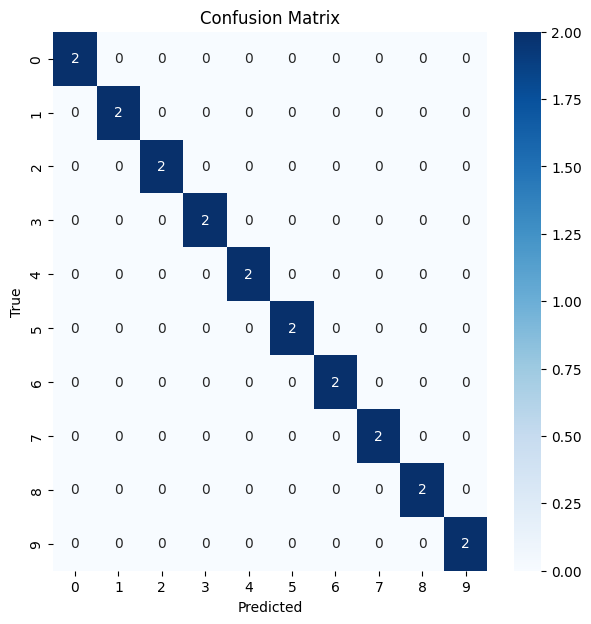

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 定义获取并保存320*320的手写数字的函数，保存时将图像压缩为32*32，并按顺序命名为0_1.png, 1_1.png, 2_1.png...0_2.png, 1_2.png, 2_2.png...共2组20张图片
def getNSaveHadwrittenDigit(num=20):
    img = np.zeros((320, 320), np.uint8)  # 初始化320x320的黑色画布
    counter = 0
    brush_size = 5  # 设置画笔大小为5

    # 创建保存图像的文件夹
    if not os.path.exists('./data/images'):
        os.makedirs('./data/images')

    # 鼠标回调函数
    def mouse_callback(event, x, y, flags, param):
        nonlocal img
        if event == cv2.EVENT_LBUTTONDOWN:  # 鼠标左键按下
            cv2.circle(img, (x, y), brush_size, (255, 255, 255), -1)  # 用白色绘制圆形，模拟画笔
        elif event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON:  # 按住左键移动
            cv2.circle(img, (x, y), brush_size, (255, 255, 255), -1)  # 用白色绘制圆形

    while counter < num:
        # 显示窗口，标题根据当前数字显示
        window_name = f"Write {counter % 10}"
        cv2.namedWindow(window_name)
        cv2.setMouseCallback(window_name, mouse_callback)
        
        cv2.imshow(window_name, img)
        key = cv2.waitKey(1)  # 等待按键事件

        if key == ord('q'):  # 按'q'键保存并退出
            # 将320x320图像压缩为32x32，并保存
            resized_img = cv2.resize(img, (32, 32))
            cv2.imwrite(f'./data/images/{counter // 10}_{counter % 10 + 1}.png', resized_img)
            img = np.zeros((320, 320), np.uint8)  # 清空图像以便继续画下一个
            cv2.destroyWindow(window_name)  # 销毁当前窗口
            counter += 1
        
        if key == ord('r'):  # 按'r'键重置图像
            img = np.zeros((320, 320), np.uint8)  # 重置画布

    cv2.destroyAllWindows()

# 定义图像的读取和预处理函数
def loadingNLoadingImages():
    images = []
    labels = []
    
    # 检查数据目录是否存在
    if not os.path.exists('./data/images'):
        raise FileNotFoundError("图像文件夹 './data/images' 不存在，确保文件已保存")
    
    for i in range(2):  # 假设分两组数据
        for j in range(10):  # 每组10张
            img_path = f'./data/images/{i}_{j+1}.png'
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # 检查图像是否加载成功
            if img is None:
                print(f"Error loading image {img_path}")
                continue
            
            img = cv2.resize(img, (32, 32))  # 确保图像大小为32x32
            img = img / 255.0  # 归一化到0-1之间
            images.append(img)
            labels.append(j)
    
    images = np.array(images).reshape(-1, 32, 32, 1)  # 转换为适合TensorFlow训练的格式
    labels = np.array(labels)
    
    return images, labels

# 定义图像数据增强
def dataAugmentation(images):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False
    )
    datagen.fit(images)
    return datagen

# 定义GoogleNet模型
def buildGoogLeNetModel():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 1)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')  # 10个类别
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 训练模型
def trainModel(model, images, labels, augmented_images):
    model.fit(augmented_images, labels, epochs=5, batch_size=32)

# 计算并显示混淆矩阵
def evaluateModel(model, images, labels):
    predictions = np.argmax(model.predict(images), axis=1)
    cm = confusion_matrix(labels, predictions)
    
    plt.figure(figsize=(7, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# 主执行流程
if __name__ == "__main__":
    # 获取并保存手写数字
    getNSaveHadwrittenDigit(20)
    
    # 加载并处理图像
    try:
        images, labels = loadingNLoadingImages()
    except FileNotFoundError as e:
        print(str(e))
        exit()

    # 数据增强
    datagen = dataAugmentation(images)

    # 构建GoogleNet模型
    model = buildGoogLeNetModel()

    # 使用数据增强的图像训练模型
    trainModel(model, images, labels, images)  # 使用原始图像作为示例，数据增强会在训练时自动进行

    # 评估模型
    evaluateModel(model, images, labels)


e:\Anaconda3\envs\tensorflow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step - accuracy: 0.1000 - loss: 2.2897
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9000 - loss: 2.1132
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.9027
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 1.6437
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 1.0000 - loss: 1.3438
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


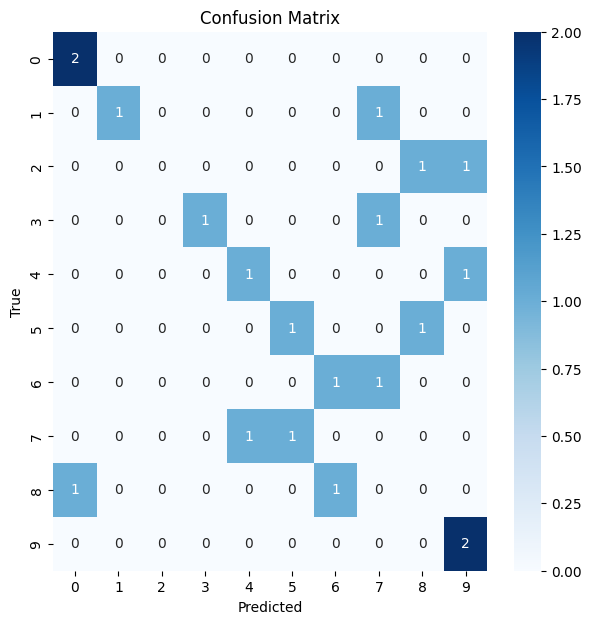

已将验证集中的图像重命名并转移到训练集。


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 获取目录中最大的编号，作为新数据集的起始编号
def getMaxImageIndex(directory, label=None):
    files = os.listdir(directory)
    max_index = -1
    for file in files:
        if file.endswith('.png'):
            # 获取文件的数字编号
            base_name = file.split('.')[0]
            file_label, index = map(int, base_name.split('_'))  # 获取文件名中的标签和组编号
            if label is None or file_label == label:  # 如果指定了标签，过滤相应标签的文件
                max_index = max(max_index, index)
    return max_index + 1  # 返回下一个编号

# 定义获取并保存320*320的手写数字的函数，保存时将图像压缩为32*32，并按顺序命名为{数字标签}_{第几组数字}.png
def getNSaveHadwrittenDigit(num=20, is_validation=False):
    # 根据当前目录最大编号生成新的编号
    folder = './data/validation' if is_validation else './data/images'
    start_idx = getMaxImageIndex(folder)

    img = np.zeros((320, 320), np.uint8)  # 初始化320x320的黑色画布
    counter = 0
    brush_size = 5  # 设置画笔大小为5

    # 创建保存图像的文件夹（如果不存在）
    if not os.path.exists(folder):
        os.makedirs(folder)

    # 鼠标回调函数
    def mouse_callback(event, x, y, flags, param):
        nonlocal img
        if event == cv2.EVENT_LBUTTONDOWN:  # 鼠标左键按下
            cv2.circle(img, (x, y), brush_size, (255, 255, 255), -1)  # 用白色绘制圆形，模拟画笔
        elif event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON:  # 按住左键移动
            cv2.circle(img, (x, y), brush_size, (255, 255, 255), -1)  # 用白色绘制圆形

    while counter < num:
        # 显示窗口，标题根据当前数字显示
        window_name = f"Write {counter % 10}"
        cv2.namedWindow(window_name)
        cv2.setMouseCallback(window_name, mouse_callback)
        
        cv2.imshow(window_name, img)
        key = cv2.waitKey(1)  # 等待按键事件

        if key == ord('q'):  # 按'q'键保存并退出
            # 将320x320图像压缩为32x32，并保存
            resized_img = cv2.resize(img, (32, 32))
            label = counter % 10  # 当前数字标签
            group_number = counter // 10 + 1  # 当前数字标签组的编号
            cv2.imwrite(f'{folder}/{label}_{group_number}.png', resized_img)
            img = np.zeros((320, 320), np.uint8)  # 清空图像以便继续画下一个
            cv2.destroyWindow(window_name)  # 销毁当前窗口
            counter += 1
        
        if key == ord('r'):  # 按'r'键重置图像
            img = np.zeros((320, 320), np.uint8)  # 重置画布

    cv2.destroyAllWindows()

# 定义图像的读取和预处理函数，增加路径参数
def loadingNLoadingImages(data_path):
    images = []
    labels = []
    
    # 检查数据目录是否存在
    if not os.path.exists(data_path):
        raise FileNotFoundError(f"图像文件夹 '{data_path}' 不存在，确保文件已保存")
    
    for label in range(10):  # 处理每个标签0~9
        for group in range(1, 3):  # 假设每个标签有2组数据
            img_path = f'{data_path}/{label}_{group}.png'
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # 检查图像是否加载成功
            if img is None:
                print(f"Error loading image {img_path}")
                continue
            
            img = cv2.resize(img, (32, 32))  # 确保图像大小为32x32
            img = img / 255.0  # 归一化到0-1之间
            images.append(img)
            labels.append(label)
    
    images = np.array(images).reshape(-1, 32, 32, 1)  # 转换为适合TensorFlow训练的格式
    labels = np.array(labels)
    
    return images, labels

# 定义图像数据增强
def dataAugmentation(images):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False
    )
    datagen.fit(images)
    return datagen

# 定义GoogleNet模型
def buildGoogLeNetModel():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 1)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')  # 10个类别
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 训练模型
def trainModel(model, images, labels, augmented_images):
    model.fit(augmented_images, labels, epochs=5, batch_size=32)

# 计算并显示混淆矩阵
def evaluateModel(model, images, labels):
    predictions = np.argmax(model.predict(images), axis=1)
    cm = confusion_matrix(labels, predictions)
    
    plt.figure(figsize=(7, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# 将验证集的数据移动到训练集，重命名组编号
def moveValidationToTraining():
    validation_folder = './data/validation'
    training_folder = './data/images'
    
    # 获取每个标签在训练集中的最大组数
    for label in range(10):
        start_group = getMaxImageIndex(training_folder, label)
        
        # 获取所有验证集图片
        validation_images = os.listdir(validation_folder)
        
        for img in validation_images:
            src_path = f'{validation_folder}/{img}'
            img_label, group = map(int, img.split('.')[0].split('_'))  # 获取标签和组编号
            
            if img_label == label:
                # 重命名组编号
                new_group = start_group
                dest_path = f'{training_folder}/{label}_{new_group}.png'
                
                # 移动并重命名文件
                os.rename(src_path, dest_path)
                start_group += 1  # 更新组编号
    
    print(f"已将验证集中的图像重命名并转移到训练集。")

# 主执行流程
if __name__ == "__main__":
    # 获取并保存手写数字
    getNSaveHadwrittenDigit(20)  # 训练集数据
    getNSaveHadwrittenDigit(20, is_validation=True)  # 验证集数据
    
    # 加载并处理图像
    try:
        train_images, train_labels = loadingNLoadingImages('./data/images')
        valid_images, valid_labels = loadingNLoadingImages('./data/validation')
    except FileNotFoundError as e:
        print(str(e))
        exit()

    # 数据增强
    train_datagen = dataAugmentation(train_images)

    # 构建GoogleNet模型
    model = buildGoogLeNetModel()

    # 使用数据增强的图像训练模型
    trainModel(model, train_images, train_labels, train_images)  # 使用原始图像作为示例，数据增强会在训练时自动进行

    # 评估模型
    evaluateModel(model, valid_images, valid_labels)
    
    # 将验证集数据剪切到训练集并重命名
    moveValidationToTraining()


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 获取目录中最大的编号，作为新数据集的起始编号
def getMaxImageIndex(directory, label=None):
    files = os.listdir(directory)
    max_index = -1
    for file in files:
        if file.endswith('.png'):
            # 获取文件的数字编号
            base_name = file.split('.')[0]
            file_label, index = map(int, base_name.split('_'))  # 获取文件名中的标签和组编号
            if label is None or file_label == label:  # 如果指定了标签，过滤相应标签的文件
                max_index = max(max_index, index)
    return max_index + 1  # 返回下一个编号

# 定义获取并保存320*320的手写数字的函数，保存时将图像压缩为32*32，并按顺序命名为{数字标签}_{第几组数字}.png
def getNSaveHadwrittenDigit(num=20, is_validation=False):
    # 根据当前目录最大编号生成新的编号
    folder = './data/validation' if is_validation else './data/images'
    start_idx = getMaxImageIndex(folder)

    img = np.zeros((320, 320), np.uint8)  # 初始化320x320的黑色画布
    counter = 0
    brush_size = 5  # 设置画笔大小为5

    # 创建保存图像的文件夹（如果不存在）
    if not os.path.exists(folder):
        os.makedirs(folder)

    # 鼠标回调函数
    def mouse_callback(event, x, y, flags, param):
        nonlocal img
        if event == cv2.EVENT_LBUTTONDOWN:  # 鼠标左键按下
            cv2.circle(img, (x, y), brush_size, (255, 255, 255), -1)  # 用白色绘制圆形，模拟画笔
        elif event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON:  # 按住左键移动
            cv2.circle(img, (x, y), brush_size, (255, 255, 255), -1)  # 用白色绘制圆形

    while counter < num:
        # 显示窗口，标题根据当前数字显示
        window_name = f"Write {counter % 10}"
        cv2.namedWindow(window_name)
        cv2.setMouseCallback(window_name, mouse_callback)
        
        cv2.imshow(window_name, img)
        key = cv2.waitKey(1)  # 等待按键事件

        if key == ord('q'):  # 按'q'键保存并退出
            # 将320x320图像压缩为32x32，并保存
            resized_img = cv2.resize(img, (32, 32))
            label = counter % 10  # 当前数字标签
            group_number = counter // 10 + 1  # 当前数字标签组的编号
            cv2.imwrite(f'{folder}/{label}_{group_number}.png', resized_img)
            img = np.zeros((320, 320), np.uint8)  # 清空图像以便继续画下一个
            cv2.destroyWindow(window_name)  # 销毁当前窗口
            counter += 1
        
        if key == ord('r'):  # 按'r'键重置图像
            img = np.zeros((320, 320), np.uint8)  # 重置画布

    cv2.destroyAllWindows()

# 定义图像的读取和预处理函数，增加路径参数
def loadingNLoadingImages(data_path):
    images = []
    labels = []
    
    # 检查数据目录是否存在
    if not os.path.exists(data_path):
        raise FileNotFoundError(f"图像文件夹 '{data_path}' 不存在，确保文件已保存")
    
    for label in range(10):  # 处理每个标签0~9
        for group in range(1, 3):  # 假设每个标签有2组数据
            img_path = f'{data_path}/{label}_{group}.png'
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # 检查图像是否加载成功
            if img is None:
                print(f"Error loading image {img_path}")
                continue
            
            img = cv2.resize(img, (32, 32))  # 确保图像大小为32x32
            img = img / 255.0  # 归一化到0-1之间
            images.append(img)
            labels.append(label)
    
    images = np.array(images).reshape(-1, 32, 32, 1)  # 转换为适合TensorFlow训练的格式
    labels = np.array(labels)
    
    return images, labels

# 定义图像数据增强
def dataAugmentation(images):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False
    )
    datagen.fit(images)
    return datagen

# 定义GoogleNet模型
def buildGoogLeNetModel():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 1)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')  # 10个类别
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 训练模型
def trainModel(model, images, labels, augmented_images):
    model.fit(augmented_images, labels, epochs=5, batch_size=32)

# 计算并显示混淆矩阵
def evaluateModel(model, images, labels):
    predictions = np.argmax(model.predict(images), axis=1)
    cm = confusion_matrix(labels, predictions)
    
    plt.figure(figsize=(7, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# 将验证集的数据移动到训练集，重命名组编号
def moveValidationToTraining():
    validation_folder = './data/validation'
    training_folder = './data/images'
    
    # 获取每个标签在训练集中的最大组数
    for label in range(10):
        start_group = getMaxImageIndex(training_folder, label)
        
        # 获取所有验证集图片
        validation_images = os.listdir(validation_folder)
        
        for img in validation_images:
            src_path = f'{validation_folder}/{img}'
            img_label, group = map(int, img.split('.')[0].split('_'))  # 获取标签和组编号
            
            if img_label == label:
                # 重命名组编号
                new_group = start_group
                dest_path = f'{training_folder}/{label}_{new_group}.png'
                
                # 移动并重命名文件
                os.rename(src_path, dest_path)
                start_group += 1  # 更新组编号
    
    print(f"已将验证集中的图像重命名并转移到训练集。")

# 主执行流程
if __name__ == "__main__":
    # 获取并保存手写数字
    getNSaveHadwrittenDigit(20)  # 训练集数据
    getNSaveHadwrittenDigit(20, is_validation=True)  # 验证集数据
    
    # 加载并处理图像
    try:
        train_images, train_labels = loadingNLoadingImages('./data/images')
        valid_images, valid_labels = loadingNLoadingImages('./data/validation')
    except FileNotFoundError as e:
        print(str(e))
        exit()

    # 数据增强
    train_datagen = dataAugmentation(train_images)

    # 构建GoogleNet模型
    model = buildGoogLeNetModel()

    # 使用数据增强的图像训练模型
    trainModel(model, train_images, train_labels, train_images)  # 使用原始图像作为示例，数据增强会在训练时自动进行

    # 评估模型
    evaluateModel(model, valid_images, valid_labels)
    
    # 将验证集数据剪切到训练集并重命名
    moveValidationToTraining()


import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

def dataAugmentation(images, labels, datagen=None, num_augmented=1000, batch_size=32, seed=42):
    """
    对训练集数据进行增强，并将增强后的数据与原始数据合并。
    
    参数:
    images (numpy.ndarray): 原始图像数据，形状为 (num_samples, height, width, channels)。
    labels (numpy.ndarray): 原始标签数据，形状为 (num_samples,)。
    datagen (ImageDataGenerator): 数据增强生成器。默认为 None，会在函数内部创建。
    num_augmented (int): 需要增强的数据量，即增强后的数据总量。
    batch_size (int): 每次生成的批次大小。
    seed (int): 随机种子。

    返回:
    numpy.ndarray: 扩展后的图像数据。
    numpy.ndarray: 扩展后的标签数据。
    """
    
    # 如果没有传入datagen，则创建一个新的
    if datagen is None:
        datagen = ImageDataGenerator(
            rotation_range=30,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=0.2,
            horizontal_flip=False
        )
    
    np.random.seed(seed)
    datagen.fit(images)
    
    augmented_images = []
    augmented_labels = []
    
    # 使用datagen生成增强的数据
    flow = datagen.flow(images, labels, batch_size=batch_size, shuffle=True, seed=seed)
    
    # 生成增强后的数据并将其与原始数据合并
    while len(augmented_images) < num_augmented:
        batch_images, batch_labels = next(flow)
        augmented_images.extend(batch_images)
        augmented_labels.extend(batch_labels)
        
    # 合并原始数据和增强数据
    augmented_images = np.array(augmented_images)
    augmented_labels = np.array(augmented_labels)
    
    # 扩展数据集：原始数据 + 增强数据
    expanded_images = np.concatenate((images, augmented_images), axis=0)
    expanded_labels = np.concatenate((labels, augmented_labels), axis=0)
    
    return expanded_images, expanded_labels

请模块化代码幷使得绘制train、valid数据集，转移validation，读取train、valid数据，对train_data数据增强（种子固定，增强前后train_datashape显示，且覆盖原有train_data），训练googleNet模型（绘制出梯度下降图），使用验证集进行验证并绘两幅图（混淆矩阵图和图片标签图，要求：混淆矩阵图用seaborn的pastel，标签图要显示图片并用plt.title显示标签和预测值，验证集不增强，应该为20个，分2行10列），请氛围不同的cell回复
最后的执行主脚本也要分四个cell：
数据集生成：进行20个训练集和20个验证集的绘制（在validation非空时不执行validation绘制，只读取validation中的20个验证样本）
数据增强模块：对训练集进行扩展是数据增强（可不执行，即执行前后的训练集均为train_data和train_labels）
模型拟合与评估模块：使用训练集训练模型并在验证集上测试后并绘图
迁移测试集：将validation中的图像重命名并迁移至images

SyntaxError: invalid character '、' (U+3001) (3319086740.py, line 1)

# 完整过程

##